In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4

In [3]:
gdf = gpd.read_file("../data/CHRUN/catchments/catchments.shp")
print("Coordinate System:", gdf.crs)
print("Oringin: Bern (600km, 200km)")
print("Fields:", gdf.columns)
print("HRU: Hydrological Response Unit (Area with same characteristics)")
gdf

Coordinate System: EPSG:21781
Oringin: Bern (600km, 200km)
Fields: Index(['hru', 'geometry'], dtype='object')
HRU: Hydrological Response Unit (Area with same characteristics)


,hru,geometry
0,HSU_001,"POLYGON ((7.16e+05 1.35e+05, 7.16e+05 1.35e+05..."
1,HSU_002,"MULTIPOLYGON (((5.8e+05 2.54e+05, 5.8e+05 2.54..."
2,HSU_003,"MULTIPOLYGON (((5.2e+05 1.46e+05, 5.2e+05 1.46..."
3,HSU_004,"POLYGON ((6.9e+05 2.45e+05, 6.91e+05 2.46e+05,..."
4,HSU_005,"POLYGON ((6.88e+05 2.06e+05, 6.88e+05 2.06e+05..."
...,...,...
302,HSU_303,"POLYGON ((6.06e+05 1.12e+05, 6.04e+05 1.13e+05..."
303,HSU_304,"POLYGON ((7.82e+05 1.73e+05, 7.82e+05 1.74e+05..."
304,HSU_305,"POLYGON ((5.84e+05 1.95e+05, 5.84e+05 1.96e+05..."
305,HSU_306,"MULTIPOLYGON (((6.85e+05 2.74e+05, 6.84e+05 2...."


[Text(0, 50000.0, '50 km'),
 Text(0, 100000.0, '100 km'),
 Text(0, 150000.0, '150 km'),
 Text(0, 200000.0, '200 km'),
 Text(0, 250000.0, '250 km'),
 Text(0, 300000.0, '300 km'),
 Text(0, 350000.0, '350 km')]

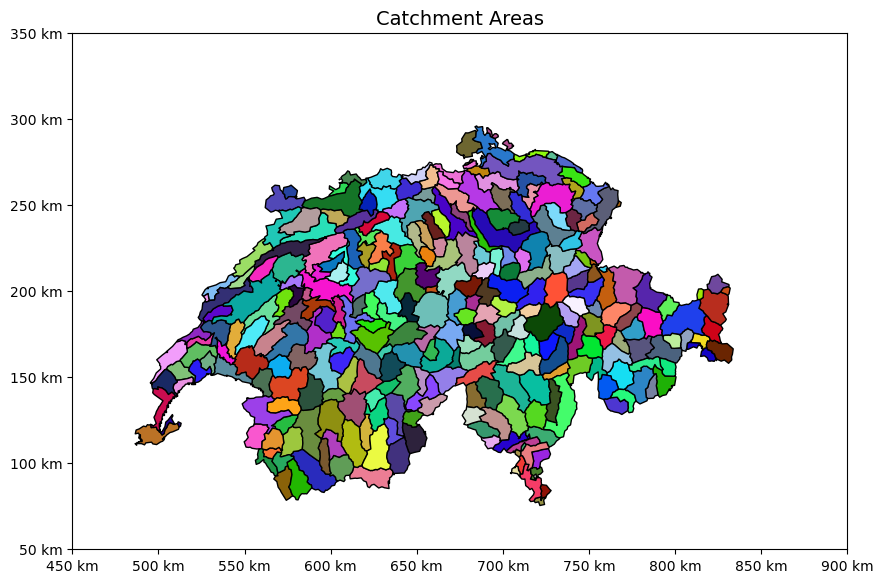

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))
color = np.random.rand(len(gdf), 3)
gdf.plot(ax = ax, color = color, edgecolor='black')

plt.title("Catchment Areas", fontsize=14)

x_ticks = ax.get_xticks()
y_ticks = ax.get_yticks()
ax.set_xticks(x_ticks)
ax.set_yticks(y_ticks)
ax.set_xticklabels([f"{int(x)} km" for x in x_ticks / 1000])
ax.set_yticklabels([f"{int(y)} km" for y in y_ticks / 1000])

In [14]:
nc_data = xr.open_dataset("../data/CHRUN/chrun.nc")
nc_data

<xarray.Dataset> Size: 111MB
Dimensions:                    (hru: 307, time: 22645)
Coordinates:
  * hru                        (hru) <U7 9kB 'HSU_001' 'HSU_002' ... 'HSU_307'
  * time                       (time) datetime64[ns] 181kB 1962-01-01 ... 202...
Data variables: (12/32)
    P                          (hru, time) float32 28MB 18.54 8.05 ... 0.0 8.06
    Qmm_mod                    (hru, time) float32 28MB 1.993 2.305 ... 1.225
    Qmm_prevah                 (hru, time) float32 28MB nan nan nan ... nan nan
    T                          (hru, time) float32 28MB 0.67 -0.99 ... 6.93 4.86
    abb                        (hru) float32 1kB 29.28 33.01 ... 33.38 32.74
    area                       (hru) float64 2kB 2.445e+08 ... 1.968e+08
    ...                         ...
    frac_wetlands              (hru) float32 1kB 0.002047 0.0 ... 0.001185 0.0
    frac_sub_Alpine_meadow     (hru) float32 1kB 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
    frac_alpine_meadow         (hru) float32 1kB 0.007165 0.0 ... 0.0 0.0
    frac_bare_soil_vegetation  (hru) float32 1kB 0.1228 0.0 ... 0.003817
    frac_grapes                (hru) float32 1kB 0.001024 0.0 ... 0.001272
    slp                        (hru) float32 1kB 24.12 2.003 ... 3.504 6.439
Attributes:
    title:           CH-RUN: A deep-learning-based spatially contiguous runof...
    institution:     IAC, ETH Zurich
    source:          CH-RUN
    comment:         Modeled runoff product (CH-RUN): Qmm_mod, PREVAH runoff:...
    references:      Kraft et al. (2025): CH-RUN: A deep-learning-based spati...
    version_number:  1.0
    contact:         Basil Kraft (basilkraft@env.ethz.ch), Lukas Gudmundsson ...

In [15]:
print(nc_data["frac_urban_areas"].values)

[0.00409417 0.25       0.02331002 0.04608295 0.01785714 0.00663717
 0.         0.         0.04008909 0.05429864 0.0625     0.03108808
 0.0058651  0.00996678 0.01777778 0.0125     0.021875   0.06884058
 0.03351206 0.04697987 0.00803213 0.01799775 0.00358423 0.
 0.         0.16666667 0.03584673 0.         0.         0.00934579
 0.00671141 0.01164021 0.         0.03926097 0.01909959 0.01420455
 0.04471101 0.         0.00144092 0.         0.02285714 0.
 0.         0.         0.05147059 0.03771044 0.046875   0.00296736
 0.0564784  0.04878049 0.02083333 0.00667408 0.         0.00278164
 0.02898551 0.         0.         0.01106501 0.05249344 0.025
 0.00614251 0.00355872 0.0141791  0.         0.00713012 0.00625
 0.00665779 0.00647249 0.         0.04323308 0.02941176 0.00679348
 0.00479616 0.         0.07303371 0.00086655 0.00335946 0.02916667
 0.00209644 0.11367127 0.         0.00719424 0.00442478 0.00541272
 0.         0.05042017 0.         0.00696056 0.05037783 0.
 0.01542416 0.04787234 0.  

In [17]:
import xarray as xr

# NetCDF-Datei laden
nc_data = xr.open_dataset("../data/CHRUN/chrun.nc")

# Liste der Variablen mit long_name
variables_with_long_name = {var: nc_data[var].attrs.get("long_name", "Kein long_name vorhanden") for var in nc_data.data_vars}

# Ausgabe der Liste
for var, long_name in variables_with_long_name.items():
    print(f"{var}: {long_name}")


P: Precipitation
Qmm_mod: Runoff (CH-RUN)
Qmm_prevah: Runoff (PREVAH)
T: Air temperature
abb: Soil-topographic index
area: Catchment area
atb: Hydraulic-topographic index
btk: Soil depth
dhm: Elevation
glm: Glacier morphology
kwt: Hydraulic conductivity
pfc: Soil water storage capacity
frac_water: Water fraction
frac_urban_areas: Urban areas fraction
frac_coniferous_forests: Coniferous forests fraction
frac_deciduous_forests: Deciduous forests fraction
frac_mixed_forests: Mixed forests fraction
frac_cereals: Cereals fraction
frac_pasture: Pasture fraction
frac_bush: Bush fraction
frac_unknown: Unknown fraction
frac_firn: Firn fraction
frac_bare_ice: Bare ice fraction
frac_rock: Rock fraction
frac_vegetables: Vegetables fraction
frac_alpine_vegetation: Alpine vegetation fraction
frac_wetlands: Wetlands fraction
frac_sub_Alpine_meadow: Sub alpine meadow fraction
frac_alpine_meadow: Alpine meadow fraction
frac_bare_soil_vegetation: Bare soil vegetation fraction
frac_grapes: Grapes fractio